In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
warnings.filterwarnings("ignore")

In [2]:
#reading the data we have
train_data = pd.read_csv("C:/Users/Chesta/Downloads/walmart-recruiting-store-sales-forecasting/train.csv/train.csv")
features_data = pd.read_csv("C:/Users/Chesta/Downloads/walmart-recruiting-store-sales-forecasting/features.csv/features.csv")
store_data = pd.read_csv("C:/Users/Chesta/Downloads/walmart-recruiting-store-sales-forecasting/stores.csv")

In [3]:
features_train_data = train_data.merge(features_data,left_on=['Store','Date'],right_on=['Store','Date'])

In [4]:
combine_data = features_train_data.merge(store_data,left_on=['Store'],right_on=['Store'])
combine_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [5]:
combine_data.sort_values(by=['Store','Dept'],inplace=True)

In [6]:
combine_data.reset_index(drop=True,inplace=True)
combine_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [7]:
combine_data['Date']= pd.to_datetime(combine_data['Date'],errors='coerce')

In [8]:
combine_data['year']=combine_data.Date.dt.year
combine_data['month']=combine_data.Date.dt.month
combine_data['weekday']=combine_data.Date.dt.day_of_week
combine_data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,weekday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,2,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,2010,2,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2010,2,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,2010,2,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,2010,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221,2012,9,4
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221,2012,10,4
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221,2012,10,4
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221,2012,10,4


In [9]:
import seaborn as sns

<AxesSubplot: xlabel='year', ylabel='Weekly_Sales'>

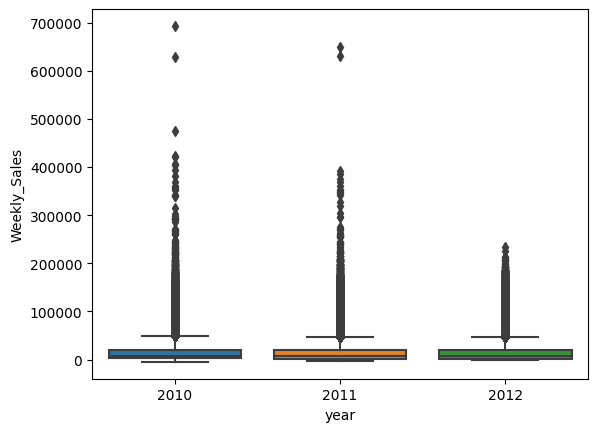

In [10]:
sns.boxplot(x='year',y='Weekly_Sales',data=combine_data)

<AxesSubplot: xlabel='month', ylabel='Weekly_Sales'>

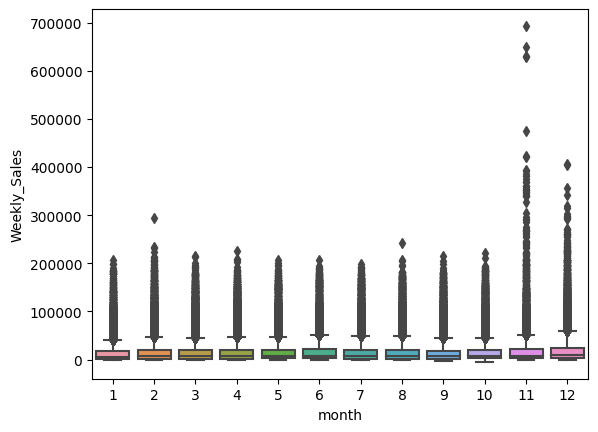

In [11]:
sns.boxplot(x='month',y='Weekly_Sales',data=combine_data)

<AxesSubplot: xlabel='Store', ylabel='Weekly_Sales'>

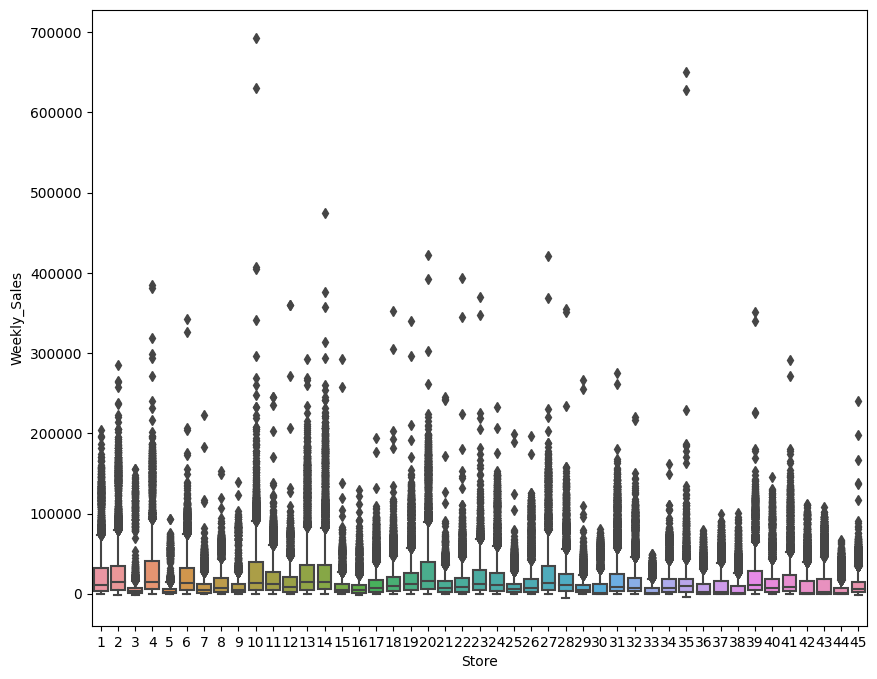

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='Store',y='Weekly_Sales',data=combine_data,ax=ax)

In [13]:
len(combine_data[combine_data.Weekly_Sales<=0])

1358

In [14]:
len(combine_data[combine_data.Weekly_Sales==0])

73

In [15]:
subset_data = combine_data[(combine_data.Store==1)]

In [16]:
x = (np.where(subset_data.Weekly_Sales<=0,(subset_data.groupby(['Store'])['Weekly_Sales'].agg(['mean'])),subset_data.Weekly_Sales))

In [17]:
df = pd.DataFrame(data = x).T[0]

In [18]:
df = df.to_frame()

In [19]:
df.columns =['Weekly_Sales']
df

,Weekly_Sales
0,24924.50
1,46039.49
2,41595.55
3,19403.54
4,21827.90
...,...
10239,20.06
10240,0.05
10241,0.03
10242,635.00


In [20]:
df.Weekly_Sales.quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

0.10      1018.4140
0.25      3513.9325
0.50     10343.6900
0.75     31452.9575
0.90     59213.9490
0.95     77649.0105
0.99    131921.9849
Name: Weekly_Sales, dtype: float64

In [21]:
## finding and working on outliers
def outliers(data,variable):
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3-q1
    
    inner = 1.5*iqr
    outer = 3*iqr

    ## lower and upper of inner
    inner_lower = q1 -inner
    inner_upper = q3 + inner

    ## lower and upper of outter

    outer_lower = q1-outer
    outer_upper = q3 + outer

    probable_outliers =[]
    possible_outliers = []

    for i,j in data[variable].items():
        if (j <= outer_lower or j>=outer_upper):
            probable_outliers.append(i)
        
    for i,j in data[variable].items():
        if j<= inner_lower or j>= inner_upper:
            possible_outliers.append(i)
    
    return probable_outliers, possible_outliers

In [22]:
probable_outliers, possible_outliers = outliers(subset_data,"Weekly_Sales")

In [23]:
len(probable_outliers)

236

In [24]:
len(possible_outliers)

593

In [25]:
x= (np.where(subset_data.Weekly_Sales<=3513.9325,(subset_data.groupby(['Store'])['Weekly_Sales'].agg(['mean'])),np.where(subset_data.Weekly_Sales>=77649.0105,77649.0105,subset_data['Weekly_Sales'])))

In [26]:
df = pd.DataFrame(data = x).T[0]

In [27]:
df = df.to_frame()
df.columns =['Weekly_Sales']
df

,Weekly_Sales
0,24924.500000
1,46039.490000
2,41595.550000
3,19403.540000
4,21827.900000
...,...
10239,21710.543621
10240,21710.543621
10241,21710.543621
10242,21710.543621


In [28]:
df.Weekly_Sales.quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

0.10     5691.923000
0.25    10343.925000
0.50    21710.543621
0.75    31452.957500
0.90    59213.949000
0.95    77646.877425
0.99    77649.010500
Name: Weekly_Sales, dtype: float64

In [29]:
probable_outliers, possible_outliers = outliers(df,"Weekly_Sales")

In [30]:
len(probable_outliers)

0

In [32]:
subset_data['Weekly_Sales'] = df['Weekly_Sales']
subset_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,weekday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,2,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,2010,2,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2010,2,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,2010,2,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,2010,3,4


In [33]:
def plot_data(col2):
    fig,axes = plt.subplots(3,1,figsize=(10,8),sharex=False,sharey=False)
    sns.lineplot(ax=axes[0],x="Date",y=col2,data=subset_data)
    sns.lineplot(ax=axes[1],x="month",y=col2,data=subset_data)
    sns.lineplot(ax=axes[2],x="year",y=col2,data=subset_data)
    plt.tight_layout()
    plt.show()
    

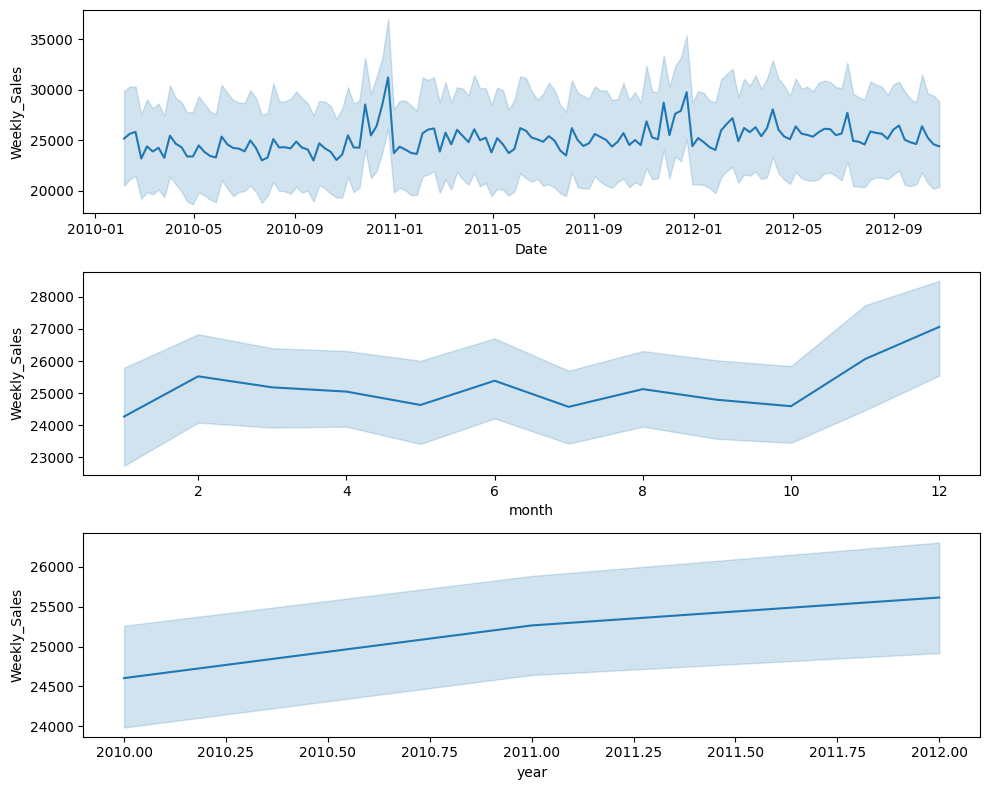

In [34]:
plot_data("Weekly_Sales")

In [35]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
def adf(x):
    res = adfuller(x)
    print("test statistics:",res[0])
    print("p-value:",res[1] )
    if res[1]<0.05:
        print("stationary")
    else:
        print("Non_stationary")

In [36]:
adf(subset_data.iloc[:8,3])

test statistics: -1.6358823468803694
p-value: 0.46441318625661565
Non_stationary


In [37]:
data_dept_1 = subset_data[subset_data['Dept']==1]


In [38]:
adf(data_dept_1['Weekly_Sales'])

test statistics: -2.5221638686500385
p-value: 0.1101743228258697
Non_stationary


In [39]:
decomposition = sm.tsa.seasonal_decompose(data_dept_1['Weekly_Sales'], model='multiplicative',period=12)

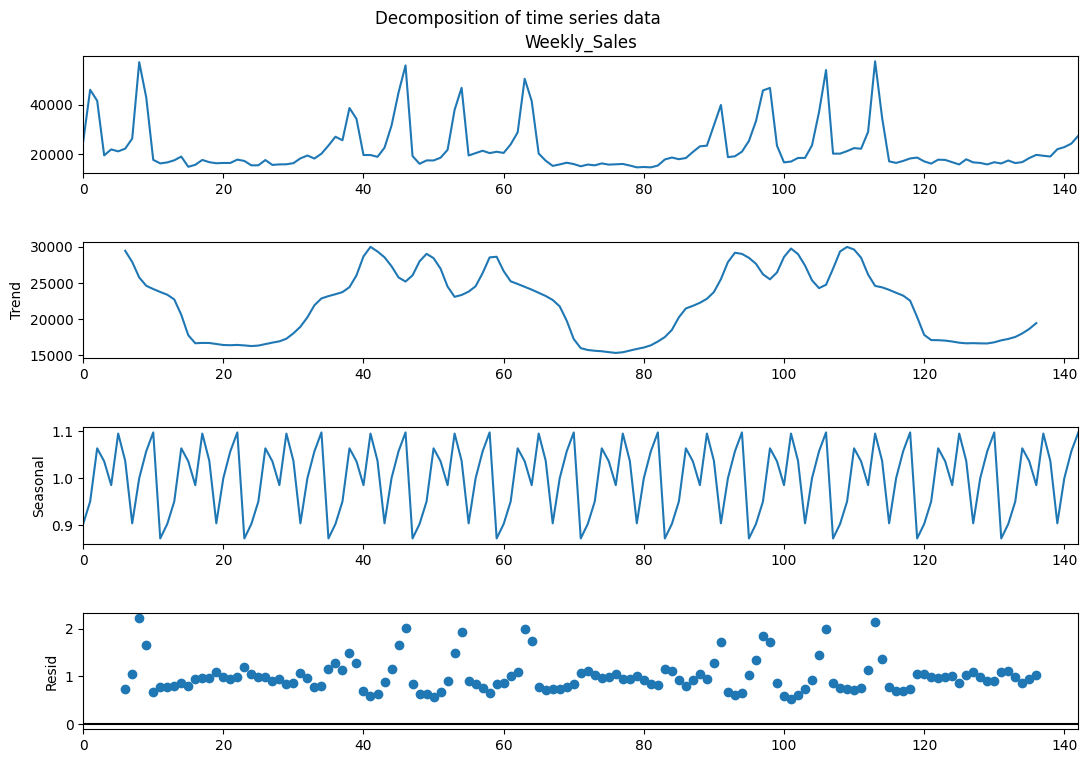

In [40]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of time series data')
plt.show()

In [41]:
subset_data['log_weekly_sale']= np.log(subset_data['Weekly_Sales'])
subset_data['log_diff'] = (subset_data['log_weekly_sale'].diff())

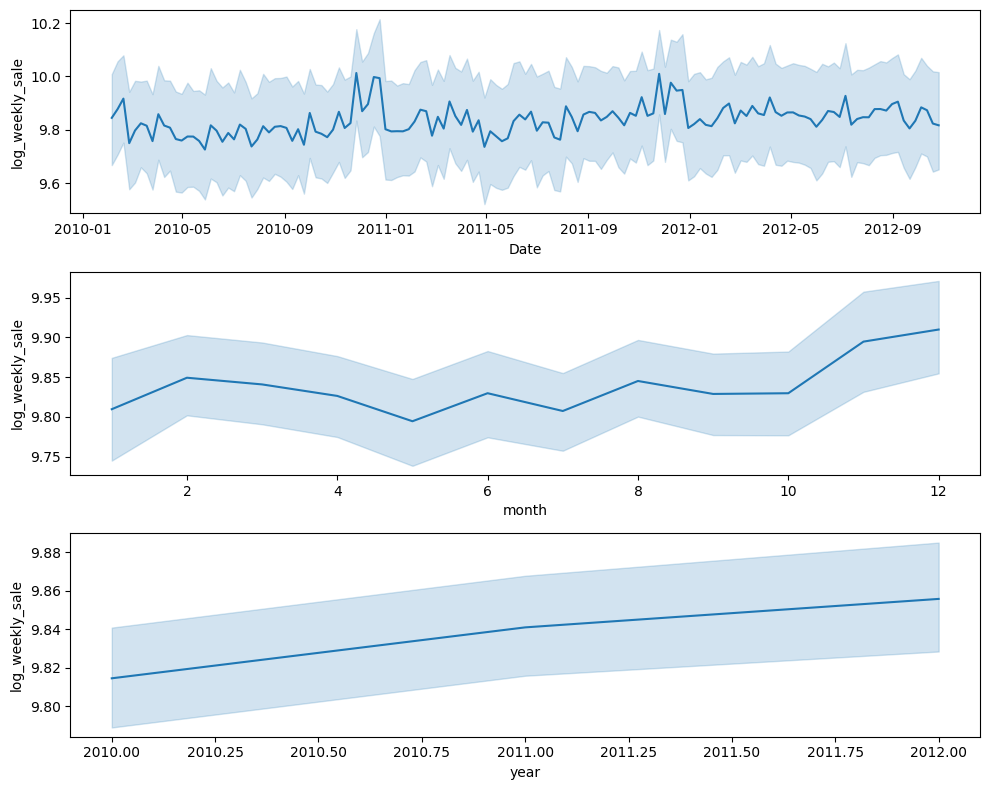

In [42]:
plot_data('log_weekly_sale')

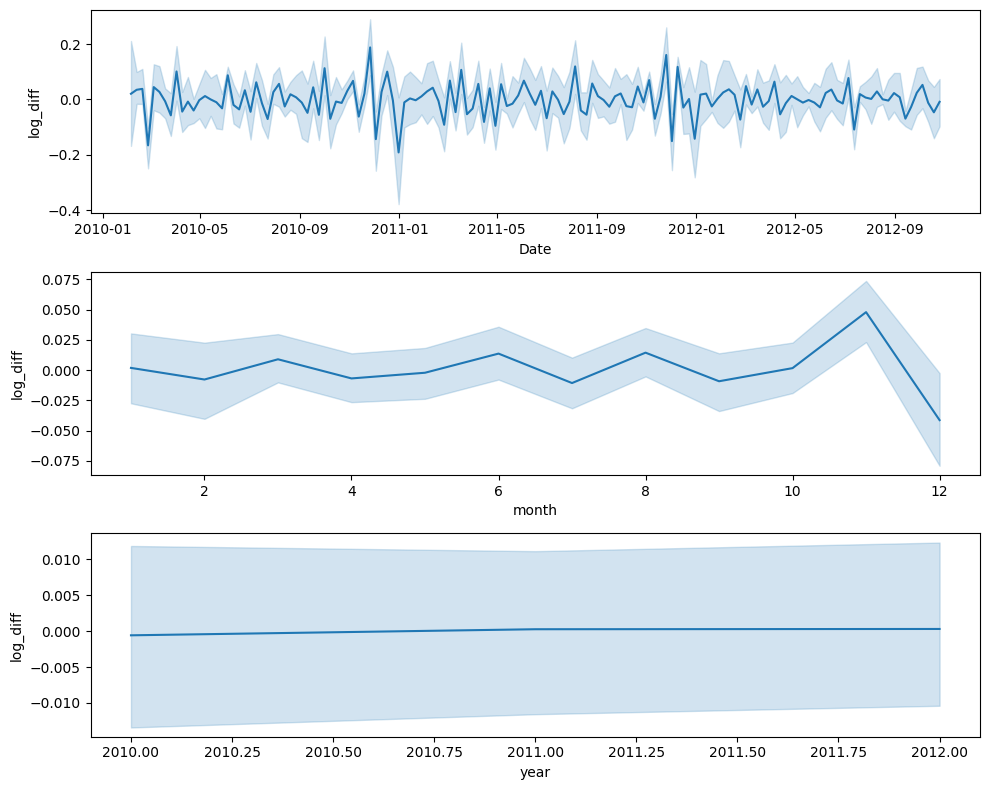

In [43]:
plot_data('log_diff')

In [44]:
adf(subset_data['log_diff'].dropna())

test statistics: -22.255291476909644
p-value: 0.0
stationary


In [45]:
data_sm = subset_data
# data_sm

In [46]:
data_sm['Date2']= data_sm['Date'].apply(lambda x :x.to_period("W-FRI"))
data_sm.set_index("Date2",inplace=True)
data_sm.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,weekday,log_weekly_sale,log_diff
Date2,,,,,,,,,,,,,,,,,,,,,
2010-01-30/2010-02-05,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,False,A,151315,2010,2,4,10.123607,NaN
2010-02-06/2010-02-12,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,211.242170,8.106,True,A,151315,2010,2,4,10.737255,0.613648
2010-02-13/2010-02-19,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,211.289143,8.106,False,A,151315,2010,2,4,10.635748,-0.101506
2010-02-20/2010-02-26,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,211.319643,8.106,False,A,151315,2010,2,4,9.873211,-0.762538
2010-02-27/2010-03-05,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,211.350143,8.106,False,A,151315,2010,3,4,9.990944,0.117733


In [47]:
data_sm = data_sm[data_sm.Dept==1]

In [50]:
Ntest =50
train = data_sm.iloc[:-Ntest]
test = data_sm.iloc[-Ntest:]

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [52]:
model = ExponentialSmoothing(train['log_weekly_sale'],
                            initialization_method = 'legacy-heuristic',
                            trend ='add', seasonal = 'add',seasonal_periods = 12
                            )
res = model.fit()

In [53]:
train['fittedvalues']=res.fittedvalues

In [54]:
forecast_data = res.forecast(Ntest)
forecast_data_dataframe = pd.DataFrame(forecast_data)
forecast_data_dataframe.columns=['pred_data']
test_pred_data = pd.concat([test.reset_index(),forecast_data_dataframe.reset_index(drop=True)],axis=1)

<AxesSubplot: xlabel='Date', ylabel='fittedvalues'>

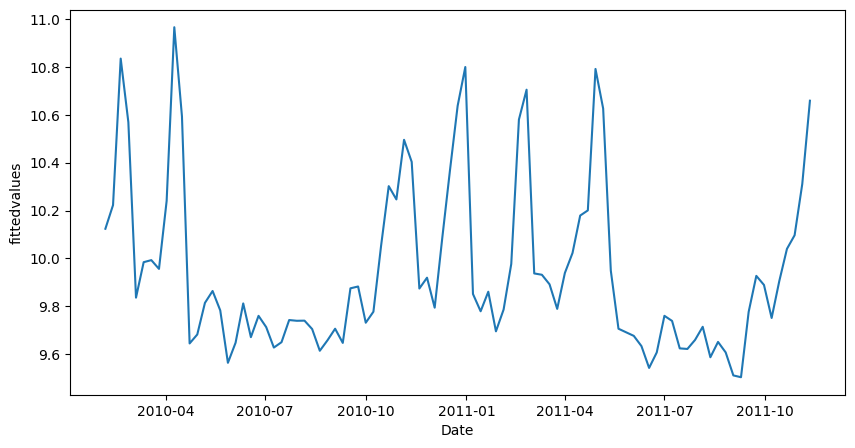

In [55]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x="Date",y="fittedvalues",data=train,ax=ax)
# sns.lineplot(x="Date",y="pred_data",data=test_pred_data,ax=ax)

In [57]:
ses_data_forecast = pd.concat([train.reset_index(),test_pred_data.reset_index()],axis=0)

In [58]:
ses_data_forecast
ses_data_forecast['fit_test_values'] = np.where(ses_data_forecast.fittedvalues.isna(),ses_data_forecast.pred_data,ses_data_forecast.fittedvalues)

<AxesSubplot: xlabel='Date', ylabel='log_weekly_sale'>

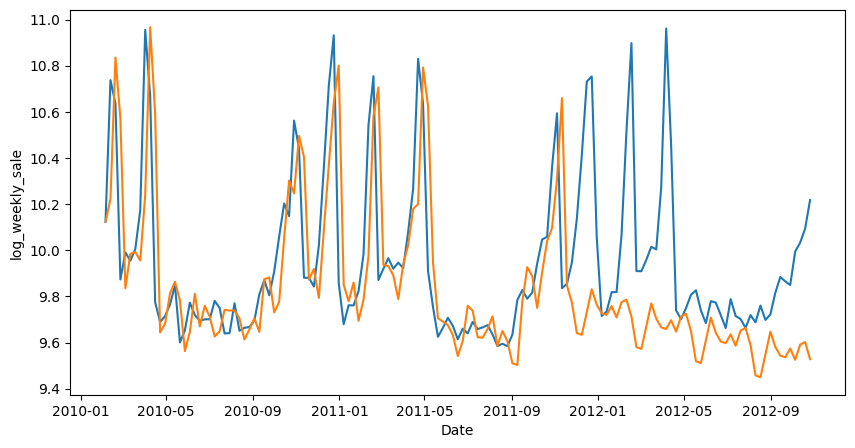

In [59]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x="Date",y="log_weekly_sale",data=ses_data_forecast,ax=ax)
sns.lineplot(x="Date",y="fit_test_values",data=ses_data_forecast,ax=ax)

In [68]:
df_simul= res.simulate(nsimulations=Ntest,repetitions=10,anchor='start')
upper_ci = df_simul.quantile(q=0.9, axis='columns')
lower_ci = df_simul.quantile(q=0.1, axis='columns')

In [70]:
lower_ci.head()

Date2
2010-01-30/2010-02-05    9.922918
2010-02-06/2010-02-12    9.580186
2010-02-13/2010-02-19    9.747119
2010-02-20/2010-02-26    9.637691
2010-02-27/2010-03-05    9.802362
Freq: W-FRI, Name: 0.1, dtype: float64

In [71]:
upper_ci.head()

Date2
2010-01-30/2010-02-05    10.672690
2010-02-06/2010-02-12    10.706853
2010-02-13/2010-02-19    11.130470
2010-02-20/2010-02-26    11.517342
2010-02-27/2010-03-05    11.488922
Freq: W-FRI, Name: 0.9, dtype: float64

In [63]:
data_sm.dropna(subset=['log_diff'],inplace=True)

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

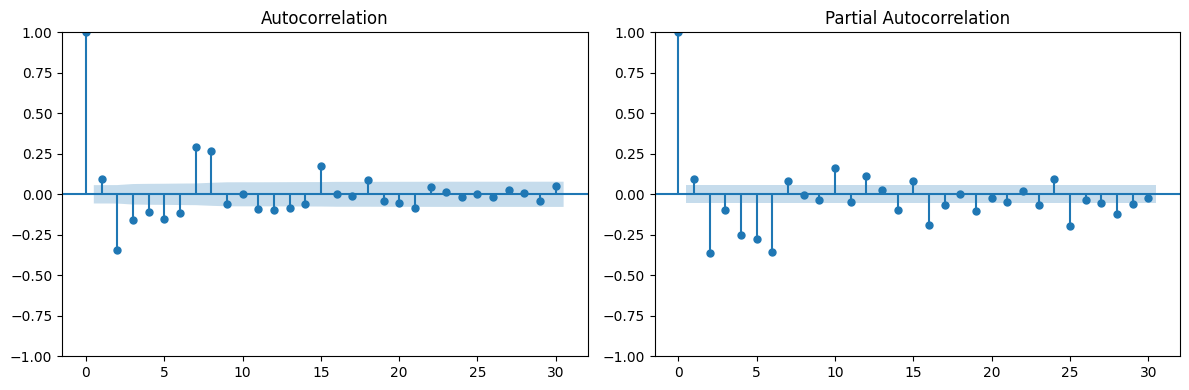

In [66]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(data_sm['log_diff'], lags=30, ax=axes[0], alpha=0.5)
plot_pacf(data_sm['log_diff'], lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [67]:
import pmdarima  as pm